In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('sign_mnist_train.csv')

In [ ]:
df.shape

(1380, 785)

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [ ]:
len(df.label.unique())

24

In [ ]:
target=df[['label']]
features=df.drop(columns=['label'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf

In [ ]:
x_train, x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1035, 784)
(345, 784)
(1035, 1)
(345, 1)


In [ ]:
## we have dataset in 2d form we should convert into image form
x_train=x_train.values.reshape(-1,28,28)

In [ ]:
x_test=x_test.values.reshape(-1,28,28)

In [ ]:
x_test.shape

(345, 28, 28)

In [ ]:
class_names=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

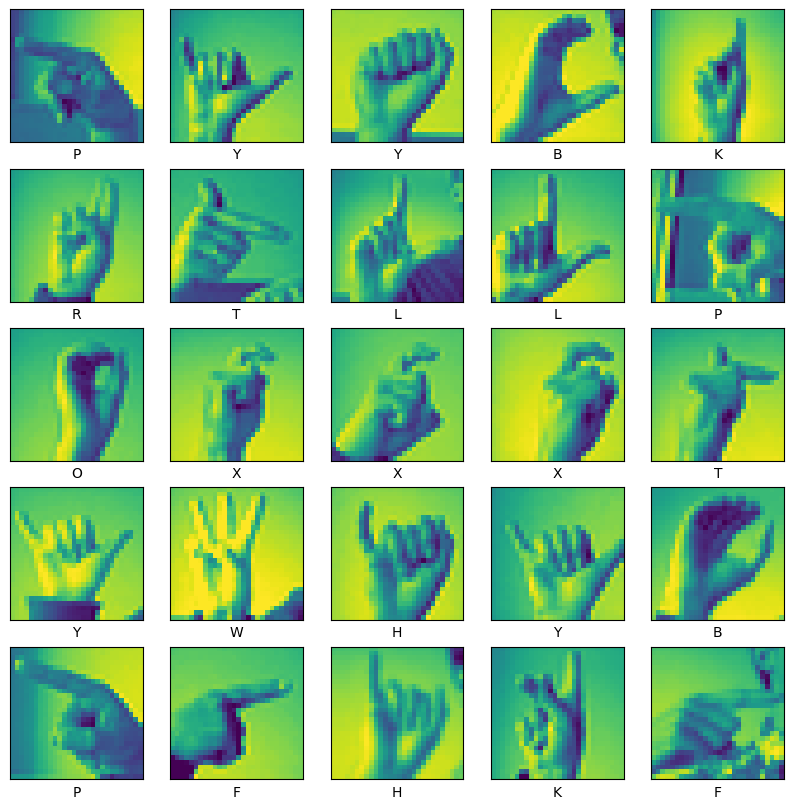

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_names[y_train.iloc[i,0]-1])

In [ ]:
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [ ]:
epoch=10
batch_size=1000
n_classes=25

In [ ]:
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))# 3,3 filter size=64 (32,32).... Con2d means convolutioanl 2D
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
cnn.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Flatten()) ## After flatten we need to connect to ANN neuron and Output
cnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,104 (74.62 KB)

 Trainable params: 19,104 (74.62 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=800,activation='relu')) #for first layer
cnn.add(tf.keras.layers.Dense(units=600,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=400,activation='relu'))## fthree hidden layers
cnn.add(tf.keras.layers.Dense(units=n_classes,activation='softmax'))
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 800)            │       640,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 600)            │       480,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 400)            │       240,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │        10,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,390,929 (5.31 MB)

 Trainable params: 1,390,929 (5.31 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## Model compile
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy']) #here we removed learning rate becoz, itz giving same loss and accuracy till last epoch
# use random search for getting better learning rate

In [ ]:
## Model Traning anf Validation
cnn1=cnn.fit(x_train,y_train,batch_size=batch_size,epochs=epoch,validation_data=(x_test,y_test))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 473ms/step - accuracy: 0.0378 - loss: 14.6743 - val_accuracy: 0.0435 - val_loss: nan
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - accuracy: 0.0560 - loss: 22.2917 - val_accuracy: 0.0580 - val_loss: nan
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step - accuracy: 0.0368 - loss: 12.3913 - val_accuracy: 0.0464 - val_loss: nan
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 263ms/step - accuracy: 0.0472 - loss: 5.9128 - val_accuracy: 0.0290 - val_loss: nan
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.0518 - loss: 3.4328 - val_accuracy: 0.0551 - val_loss: nan
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.0876 - loss: 3.1500 - val_accuracy: 0.1014 - val_loss: nan
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.1479 - loss: 3.0481 - val_accuracy: 0.1043 - val_loss: nan
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - accuracy: 0.1284 - loss: 2.9361 - val_accuracy: 0.1217 - val_loss: nan
Epoch 9/10
2/

In [ ]:
## evaluate
test_loss,test_acc=cnn.evaluate(x_test,y_test)
print('Test loss:',test_loss)
print('Test accuracy:',test_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1309 - loss: nan
Test loss: nan
Test accuracy: 0.156521737575531


In [ ]:
y_pred=cnn.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [ ]:
np.argmax(y_test[4])

np.int64(6)

In [ ]:
np.argmax(y_pred[4])

np.int64(6)

In [ ]:
from PIL import Image

In [ ]:
img=Image.open('test1.png')

In [ ]:
img.size

(170, 297)

In [ ]:
img1=img.resize((28,28))

In [ ]:
img1.size

(28, 28)

In [ ]:
img2=np.expand_dims(img1,axis=0)

In [ ]:
class_names[np.argmax(cnn.predict(img2))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


'P'